In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import PIL.Image as Image
import cv2
import numpy as np

In [2]:
data_dir = pathlib.Path('.\\Dataset')
data_dir
rices_images = {
    'Arborio' : list(data_dir.glob('Arborio/*')),
    'Basmati' : list(data_dir.glob('Basmati/*')),
    'Ipsala' : list(data_dir.glob('Ipsala/*')),
    'Jasmine' : list(data_dir.glob('Jasmine/*')),
    'Karacadag' : list(data_dir.glob('Karacadag/*'))
}

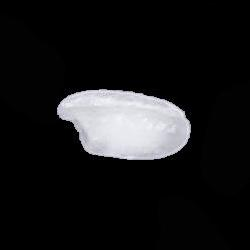

In [3]:
Image.open(rices_images['Arborio'][0])

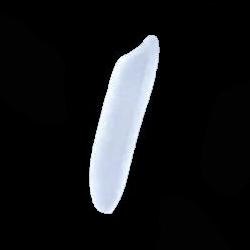

In [4]:
Image.open(rices_images['Basmati'][0])

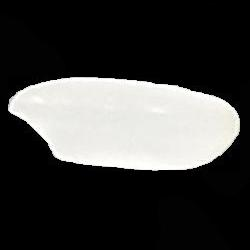

In [5]:
Image.open(rices_images['Ipsala'][0])

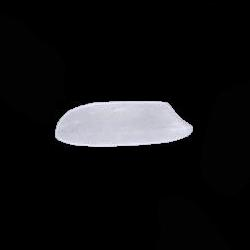

In [6]:
Image.open(rices_images['Jasmine'][0])

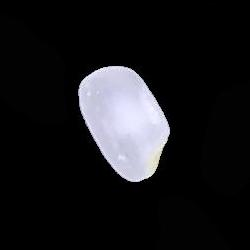

In [7]:
Image.open(rices_images['Karacadag'][0])

In [8]:
rices_images_classes = {
    'Arborio' : 0,
    'Basmati' : 1,
    'Ipsala' : 2,
    'Jasmine' : 3,
    'Karacadag' : 4
}

In [9]:
def load_in_sequence(rices_images, total_images = 200):
    print(f'Total images = {total_images * 5}')

    X, y = [], []

    for rice_name, images in rices_images.items():
        
        i = 0
        for image in images:
            img = cv2.imread(str(image))
            X.append(img)
            y.append(rices_images_classes[rice_name])
        
            i += 1
            if i >= total_images: break

    X = np.array(X)
    y = np.array(y)

    return X, y    

In [10]:
def load_random(rices_images, total_images = 200):
    print(f'Total images = {total_images * 5}')
    
    X, y = [], []

    for rice_name, images in rices_images.items():
        
        for i in range(total_images): 
            img = cv2.imread(str(images.pop(np.random.randint(0, len(images)))))
            X.append(img)
            y.append(rices_images_classes[rice_name])

    X = np.array(X)
    y = np.array(y)

    return X, y  

### Only 750 images was loaded per class due to limitation of machine's RAM (3750 images at all)

In [11]:
total_im = 750
X, y = load_random(rices_images, total_im) 

Total images = 3750


In [12]:
X.shape

(3750, 250, 250, 3)

In [13]:
y.shape

(3750,)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train = X_train / 255
X_test = X_test / 255

Epoch 1/25
94/94 [==============================] - 85s 881ms/step - loss: 1.0886 - accuracy: 0.7810 - val_loss: 0.2288 - val_accuracy: 0.9293
Epoch 2/25
94/94 [==============================] - 77s 816ms/step - loss: 0.0953 - accuracy: 0.9747 - val_loss: 0.1490 - val_accuracy: 0.9520
Epoch 3/25
94/94 [==============================] - 77s 817ms/step - loss: 0.0309 - accuracy: 0.9947 - val_loss: 0.1590 - val_accuracy: 0.9587
Epoch 4/25
94/94 [==============================] - 77s 815ms/step - loss: 0.0109 - accuracy: 0.9997 - val_loss: 0.1384 - val_accuracy: 0.9600
Epoch 5/25
94/94 [==============================] - 75s 802ms/step - loss: 0.0066 - accuracy: 0.9997 - val_loss: 0.1166 - val_accuracy: 0.9640
Epoch 6/25
94/94 [==============================] - 76s 810ms/step - loss: 0.0042 - accuracy: 0.9997 - val_loss: 0.1367 - val_accuracy: 0.9627
Epoch 7/25
94/94 [==============================] - 78s 828ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1349 - val_accuracy: 0.9640

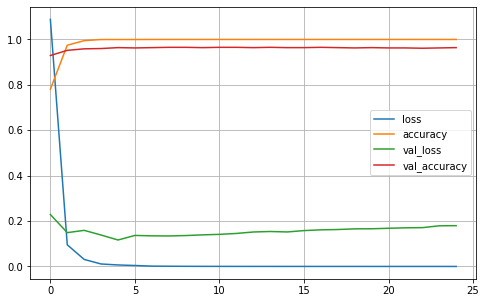

In [15]:
import keras
cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (250, 250, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(5, activation = 'sigmoid')
])

cnn_model.compile(
optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy']
)

history = cnn_model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 25,
    verbose = 1
)


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [16]:
del X
del y
del X_train
del y_train
del X_test
del y_test

### Now four types of 20 test case was done with respectively 20, 50, 100 and 200 images randomly chosen among all classes from entire dataset

In [17]:
def load_random_test_samples(rices_images, test_size = 10):
    X_test, y_true = [], []
    for _ in range(test_size):
        rice_name = np.random.choice(list(rices_images.keys()))
        img = cv2.imread(str(rices_images[rice_name][np.random.randint(0, len(rices_images[rice_name]))]))
        X_test.append(img)
        y_true.append(rices_images_classes[rice_name])

    X_test = np.array(X_test)
    y_true = np.array(y_true)

    X_test = X_test / 255

    return X_test, y_true 

In [18]:
data_dir = pathlib.Path('.\\Dataset')
data_dir
rices_images = {
    'Arborio' : list(data_dir.glob('Arborio/*')),
    'Basmati' : list(data_dir.glob('Basmati/*')),
    'Ipsala' : list(data_dir.glob('Ipsala/*')),
    'Jasmine' : list(data_dir.glob('Jasmine/*')),
    'Karacadag' : list(data_dir.glob('Karacadag/*'))
}

### Test type 1 - 20 images

In [24]:
test_cases, test_sizes = 20, 20

for i in range(test_cases):
    X_test_case, y_true = load_random_test_samples(rices_images, test_sizes)
    cnn_model.evaluate(X_test_case, y_true)


1/1 [==============================] - 0s 164ms/step - loss: 0.1261 - accuracy: 0.9500


### Test type 2 - 50 images

In [20]:
test_cases, test_sizes = 20, 50

for i in range(test_cases):
    X_test_case, y_true = load_random_test_samples(rices_images, test_sizes)
    cnn_model.evaluate(X_test_case, y_true)

2/2 [==============================] - 0s 146ms/step - loss: 0.0354 - accuracy: 0.9600


### Test type 3 - 100 images

In [21]:
test_cases, test_sizes = 20, 100

for i in range(test_cases):
    X_test_case, y_true = load_random_test_samples(rices_images, test_sizes)
    cnn_model.evaluate(X_test_case, y_true)

4/4 [==============================] - 1s 192ms/step - loss: 0.0608 - accuracy: 0.9800


### Test type 4 - 200 images

In [25]:
test_cases, test_sizes = 20, 200

for i in range(test_cases):
    X_test_case, y_true = load_random_test_samples(rices_images, test_sizes)
    cnn_model.evaluate(X_test_case, y_true)

7/7 [==============================] - 2s 242ms/step - loss: 0.0801 - accuracy: 0.9700
